# Convolution Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a CNN model to predict the class of digit.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it.

In [ ]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Reshape and normalize the features

In [ ]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train_pre.reshape(X_train_pre.shape[0], img_rows, img_cols, 1)
X_test = X_test_pre.reshape(X_test_pre.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

#3 channel inputs - 28, 28, 1

training data shape: (60000, 28, 28, 1)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [ ]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

## The model

### Build the model

In [ ]:
model = keras.Sequential()
model.add(layers.Input(X_train.shape[1:]))
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters = 20, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          32,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

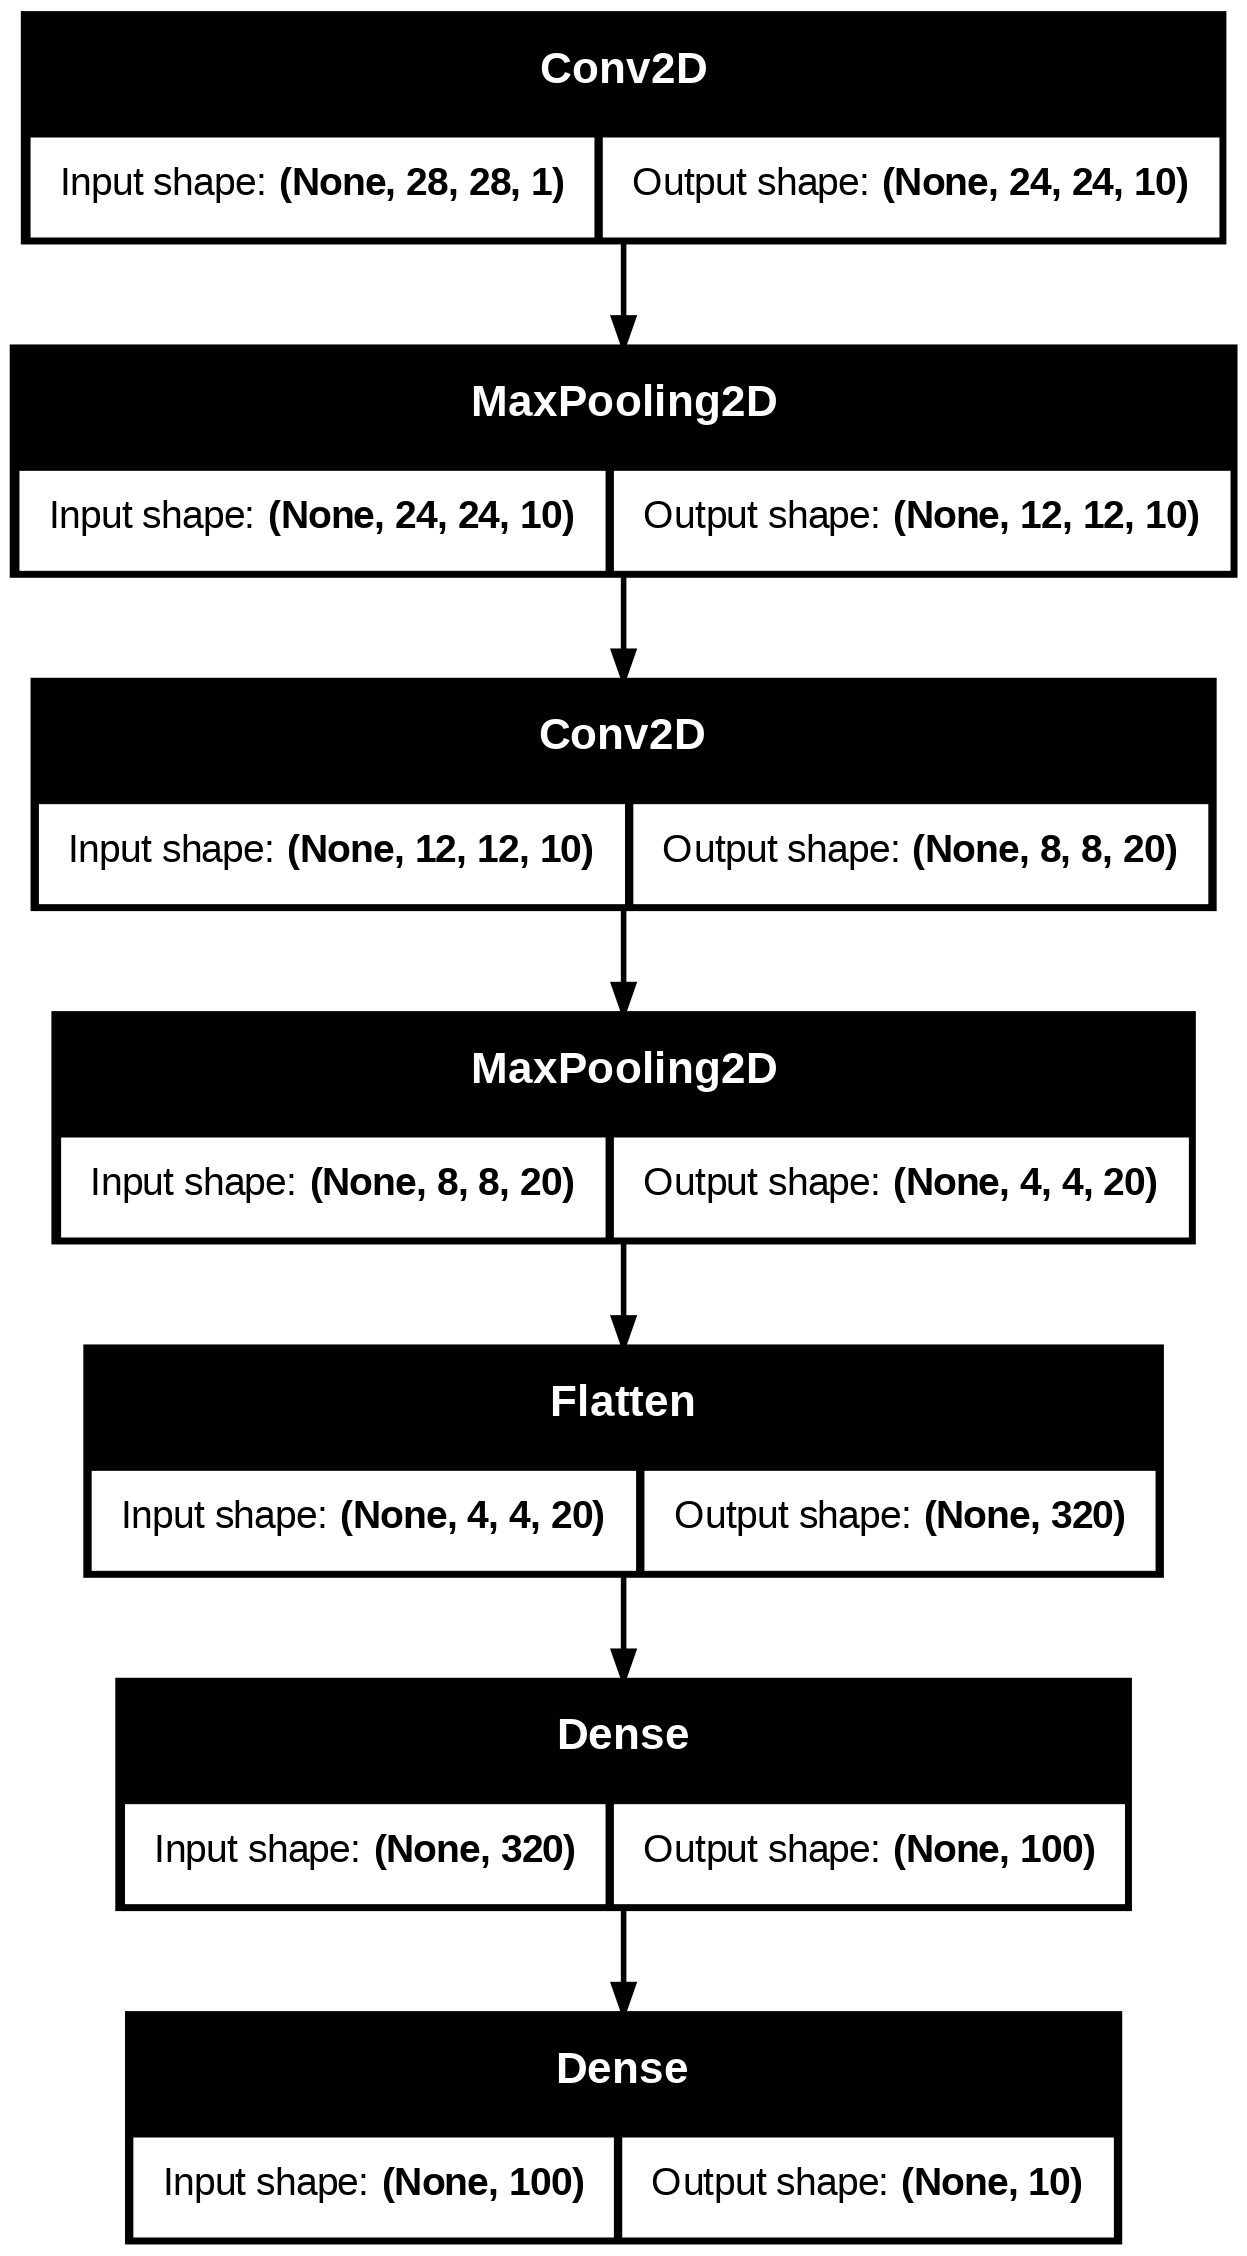

In [ ]:
keras.utils.plot_model(model, show_shapes=True)



### Train the model

In [ ]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.7844 - loss: 0.7568 - val_accuracy: 0.9678 - val_loss: 0.1139
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9691 - loss: 0.1001 - val_accuracy: 0.9766 - val_loss: 0.0792
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9799 - loss: 0.0672 - val_accuracy: 0.9810 - val_loss: 0.0628
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9835 - loss: 0.0515 - val_accuracy: 0.9827 - val_loss: 0.0570
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9868 - loss: 0.0421 - val_accuracy: 0.9855 - val_loss: 0.0506
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9888 - loss: 0.0333 - val_accuracy: 0.9869 - val_loss: 0.0441
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9838 - val_loss: 0.0553
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.9925 - loss: 0.0232 - 


### Visualize the Weights

In [ ]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
n_filters, ix = 6, 1

In [ ]:
filters.shape

(5, 5, 1, 10)

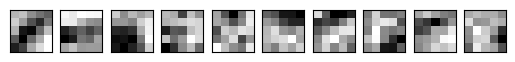

In [ ]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 10, 1
for i in range(n_filters):
  # get the filter
  f = filters[:, :, :, i]
  # plot each channel separately
  for j in range(1):
  # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
  # plot filter channel in grayscale
    plt.imshow(f[:, :, j], cmap='gray')
    ix += 1
# show the figure
plt.show()

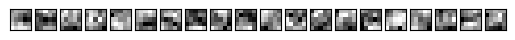

In [ ]:
filters, biases = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 20, 1
for i in range(n_filters):
  # get the filter
  f = filters[:, :, :, i]
  # plot each channel separately
  for j in range(1):
  # specify subplot and turn of axis
    ax = plt.subplot(1, n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
  # plot filter channel in grayscale
    plt.imshow(f[:, :, j], cmap='gray')
    ix += 1
# show the figure
plt.show()

# more complicated layers - more accurate

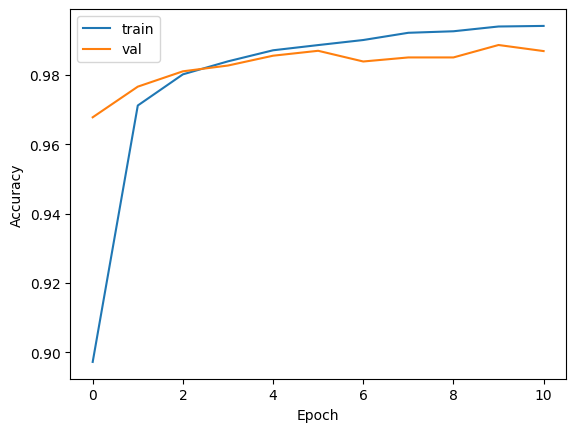

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.96%


Make predictions for testing data

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([7, 2, 1, 0, 4])

## Convolution Only Model (with Stride)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(X_train.shape[1:]))
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
model.add(layers.Conv2D(filters = 20, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          32,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.7825 - loss: 0.7577 - val_accuracy: 0.9475 - val_loss: 0.1798
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9568 - loss: 0.1424 - val_accuracy: 0.9714 - val_loss: 0.0998
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9734 - loss: 0.0887 - val_accuracy: 0.9762 - val_loss: 0.0833
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9789 - loss: 0.0660 - val_accuracy: 0.9797 - val_loss: 0.0710
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9836 - loss: 0.0530 - val_accuracy: 0.9795 - val_loss: 0.0656
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9869 - loss: 0.0421 - val_accuracy: 0.9820 - val_loss: 0.0614
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9875 - loss: 0.0390 - val_accuracy: 0.9825 - val_loss: 0.0581
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9901 - loss: 0.0320 - val_

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.53%


## With Dropout

In [ ]:
model = keras.Sequential()
model.add(layers.Input(X_train.shape[1:]))
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), # padding = "same",
                 activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(20, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          32,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.6654 - loss: 1.0097 - val_accuracy: 0.9668 - val_loss: 0.1099
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9409 - loss: 0.1974 - val_accuracy: 0.9780 - val_loss: 0.0710
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.9586 - loss: 0.1376 - val_accuracy: 0.9827 - val_loss: 0.0559
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.9674 - loss: 0.1078 - val_accuracy: 0.9843 - val_loss: 0.0512
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.9711 - loss: 0.0961 - val_accuracy: 0.9860 - val_loss: 0.0462
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9723 - loss: 0.0896 - val_accuracy: 0.9855 - val_loss: 0.0466
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.9757 - loss: 0.0778 - val_accuracy: 0.9872 - val_loss: 0.0409
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9764 - loss: 0.0756 - 

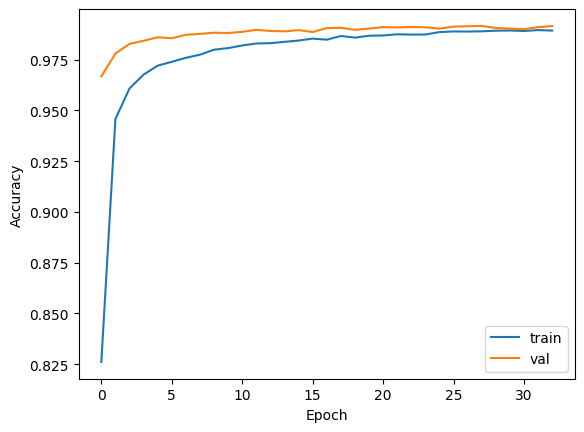

In [ ]:
plot_history(history)

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 99.27%


## Batch Normalization

In [ ]:
model = keras.Sequential()
model.add(layers.Input(X_train.shape[1:]))
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(20, (5, 5)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 24, 24, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 24, 24, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 20)            │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 8, 8, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          32,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,910 (151.99 KB)

 Trainable params: 38,650 (150.98 KB)

 Non-trainable params: 260 (1.02 KB)

In [ ]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train,
                    batch_size=BATCH, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 89ms/step - accuracy: 0.8599 - loss: 0.4943 - val_accuracy: 0.8487 - val_loss: 0.4662
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9828 - loss: 0.0616 - val_accuracy: 0.9852 - val_loss: 0.0528
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9906 - loss: 0.0357 - val_accuracy: 0.9850 - val_loss: 0.0469
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9917 - loss: 0.0288 - val_accuracy: 0.9783 - val_loss: 0.0710
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9937 - loss: 0.0222 - val_accuracy: 0.9851 - val_loss: 0.0475
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9957 - loss: 0.0162 - val_accuracy: 0.9848 - val_loss: 0.0491
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9962 - loss: 0.0139 - val_accuracy: 0.9878 - val_loss: 0.0382
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9968 - loss: 0.0114 - 

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.65%


## Data Augmentation

In [ ]:
model = keras.Sequential()
model.add(layers.Input(X_train.shape[1:]))
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(20, (5, 5)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1, # Randomly zoom image
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False,
            validation_split=0.2)

In [ ]:
train_data = datagen.flow(X_train, y_train, batch_size=BATCH, subset='training')
valid_data = datagen.flow(X_train, y_train, batch_size=BATCH, subset='validation')


In [ ]:
EPOCHS = 50
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
train_data = datagen.flow(X_train, y_train, batch_size=BATCH, subset='training')
valid_data = datagen.flow(X_train, y_train, batch_size=BATCH, subset='validation')

history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data = valid_data,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.8857 - loss: 0.4370 - val_accuracy: 0.7271 - val_loss: 0.8121
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9661 - loss: 0.1168 - val_accuracy: 0.9697 - val_loss: 0.0977
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9746 - loss: 0.0879 - val_accuracy: 0.9651 - val_loss: 0.1156
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.9792 - loss: 0.0666 - val_accuracy: 0.9769 - val_loss: 0.0763
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9826 - loss: 0.0577 - val_accuracy: 0.9822 - val_loss: 0.0653
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.9837 - loss: 0.0530 - val_accuracy: 0.9810 - val_loss: 0.0593
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.9859 - loss: 0.0474 - val_accuracy: 0.9783 - val_loss: 0.0695
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.9852 - loss: 0

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.98%
